<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/cx_pipiensstratifiedkfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
Cl = '/content/cx_pipiensdés.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-5.833954,35.759465,1,0.000000,0.000000,0.000000,0.000000,1.795786,0,0,0,0,0,0,0,10,0,0,90,2340,810,30,40,88,0,0,88,1560,3120,627,131,76,0,14949,528,46,14,95,1,0,...,26.100000,22.700001,19.400000,16.600000,8.3,9.5,11.3,12.7,14.900000,18.299999,20.799999,21.299999,19.900000,16.500000,13.300000,10.4,1.11,1.15,1.21,1.29,1.48,1.74,1.97,2.07,1.93,1.64,1.37,1.21,3.6,4.4,4.2,3.9,3.7,3.7,3.6,3.3,3.4,3.5,3.8,3.9
356,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
357,-5.360864,3

In [4]:
X = data.loc[:, data.columns != 'Cx_pipiens']
Y = data.Cx_pipiens

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-5.833954,35.759465,0.000000,0.000000,0.000000,0.000000,1.795786,0,0,0,0,0,0,0,10,0,0,90,2340,810,30,40,88,0,0,88,1560,3120,627,131,76,0,14949,528,46,14,95,1,0,96,...,26.100000,22.700001,19.400000,16.600000,8.3,9.5,11.3,12.7,14.900000,18.299999,20.799999,21.299999,19.900000,16.500000,13.300000,10.4,1.11,1.15,1.21,1.29,1.48,1.74,1.97,2.07,1.93,1.64,1.37,1.21,3.6,4.4,4.2,3.9,3.7,3.7,3.6,3.3,3.4,3.5,3.8,3.9
356,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
357,-

In [6]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
355    1
356    1
357    1
358    1
359    1
Name: Cx_pipiens, Length: 360, dtype: int64

In [7]:
 from sklearn.feature_selection import SelectFromModel,RFECV
 from sklearn.model_selection import StratifiedKFold


# xgboost

In [9]:
rfecv1 = RFECV(XGBClassifier(scale_pos_weight=0.4,learning_rate=0.1,max_depth=5,n_estimators=100),cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=45))
rfecv1.fit(X,Y)
# check the support
rfecv1.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,

In [10]:
# name wise features and count
feature_selected1 =  X.columns[rfecv1.get_support()]
feature_selected1

Index(['Bovins', 'Ovins', 'VegCul', 'VarT_Cy_IRM', 'Amp2_TempJ', 'Amp3_TempJ',
       'Var_TempJ', 'Amp2_TempN', 'VarT_ann_NDVI', 'Var_NDVI', 'Moy_EVI',
       'CEC', 'Sol_Limon', 'Elev_Max', 'Elev_Moyenne', 'IPT_Med', 'IPT_Moy',
       'Isoth', 'Bio_Tmin', 'Bio_Tint', 'Bio_Thum_Moy', 'Bio_Tch_Moy',
       'Prec_Fev', 'Prec_Avril', 'Rad_Fev', 'Rad_Aout', 'Tmax_Janv',
       'Tmax_Fev', 'Vent_Janv', 'Vent_Mars', 'Vent_Sept', 'Vent_Nov'],
      dtype='object')

In [11]:
 x_rfe1=X[feature_selected1]

In [12]:
 x_rfe1

,Bovins,Ovins,VegCul,VarT_Cy_IRM,Amp2_TempJ,Amp3_TempJ,Var_TempJ,Amp2_TempN,VarT_ann_NDVI,Var_NDVI,Moy_EVI,CEC,Sol_Limon,Elev_Max,Elev_Moyenne,IPT_Med,IPT_Moy,Isoth,Bio_Tmin,Bio_Tint,Bio_Thum_Moy,Bio_Tch_Moy,Prec_Fev,Prec_Avril,Rad_Fev,Rad_Aout,Tmax_Janv,Tmax_Fev,Vent_Janv,Vent_Mars,Vent_Sept,Vent_Nov
0,0.000000,0.000000,0,49,83,7,6,44,2,7,2906,11.166667,19.083333,11,6.0,-0.1875,0.375000,59.375002,14.5,12.000000,22.050000,22.600000,2,1,17773,23115,21.5,21.799999,4.8,6.1,6.3,5.5
1,0.000214,0.034352,0,73,126,31,26,55,13,1,2596,12.750000,17.500000,77,69.0,-0.5000,-0.281250,55.461394,12.0,17.700001,20.200000,24.266667,3,1,16620,22648,21.9,22.600000,4.2,4.8,5.7,3.7
2,0.000214,0.034352,0,73,126,31,26,55,13,1,2596,12.750000,17.500000,77,69.0,-0.5000,-0.281250,55.461394,12.0,17.700001,20.200000,24.266667,3,1,16620,22648,21.9,22.600000,4.2,4.8,5.7,3.7
3,0.000000,0.000000,0,48,120,23,25,61,8,1,2578,12.000000,18.083333,79,50.0,1.5625,0.898438,54.932949,12.3,17.400001,20.350000,24.383334,3,1,16659,22569,21.9,22.600000,4.2,5.1,5.7,3.7
4,0.000000,0.000000,0,18,115,33,26,58,1,20,2190,12.750000,13.916667,57,16.5,-3.7500,-3.468750,54.952379,12.4,17.500000,20.500000,24.500000,2,1,16615,22619,22.0,22.799999,4.2,5.0,5.6,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.000000,0.000000,0,88,46,14,59,35,61,53,3075,21.083333,29.416667,73,52.5,-0.1875,-0.078125,34.904017,8.3,19.099999,13.916667,23.750000,95,65,11911,24585,15.5,16.600000,3.6,4.2,3.4,3.8
356,8.495770,15.116930,39,80,78,5,64,40,52,100,5253,27.000000,26.916667,187,112.0,1.3125,2.828125,32.194897,9.4,18.300001,12.766667,23.866667,98,58,11971,23626,15.2,15.400000,4.1,4.6,4.0,4.0
357,7.097884,13.743934,32,80,79,4,57,34,60,70,4367,25.666667,30.833333,33,1.0,-0.8750,-1.687500,32.867785,9.9,17.900000,14.266667,23.999999,83,59,11998,23618,15.7,15.800000,3.8,4.4,4.0,3.9
358,7.411978,15.054404,60,88,66,6,45,27,84,155,5078,19.666667,28.833333,148,98.0,2.2500,2.179688,32.188646,9.4,18.200001,12.800000,23.866666,98,58,11905,23504,15.3,15.500000,4.0,4.5,3.9,3.9


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

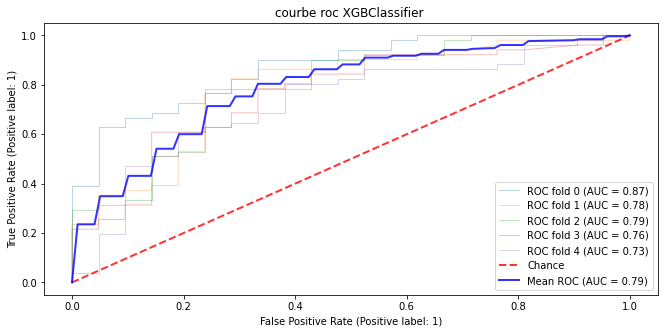

Accuracy: [0.81944444 0.77777778 0.77777778 0.76388889 0.72222222]
moy_accuracy: 0.77
precision: [0.86538462 0.83018868 0.83018868 0.82692308 0.79245283]
moy_precision: 0.83
sensibilité : [0.88235294 0.8627451  0.8627451  0.84313725 0.82352941]
moy_sensibilité: 0.85
spécificité : [0.66666667 0.57142857 0.57142857 0.57142857 0.47619048]
moy_spécificité: 0.57
MCC : [0.55714203 0.44775813 0.44775813 0.42069908 0.30909755]
MCC: 0.44
balanced_accuracy : [0.7745098  0.71708683 0.71708683 0.70728291 0.64985994]
balanced_accuracy: 0.71
roc_auc : [0.86928105 0.78478058 0.79365079 0.76190476 0.72922502]
roc_auc: 0.79
cohen_kappa_scorec : [0.55681818 0.44668588 0.44668588 0.42045455 0.30835735]
cohen_kappa_scorec: 0.44
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

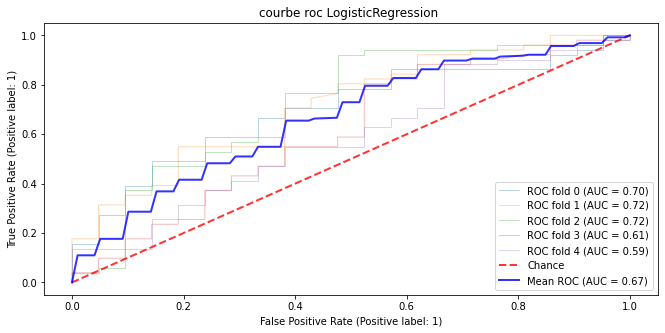

Accuracy: [0.625      0.59722222 0.59722222 0.55555556 0.56944444]
moy_accuracy: 0.59
precision: [0.81578947 0.78947368 0.80555556 0.74358974 0.72727273]
moy_precision: 0.78
sensibilité : [0.60784314 0.58823529 0.56862745 0.56862745 0.62745098]
moy_sensibilité: 0.59
spécificité : [0.66666667 0.61904762 0.66666667 0.52380952 0.42857143]
moy_spécificité: 0.58
MCC : [0.2499317  0.18872393 0.21389632 0.084324   0.05223374]
MCC: 0.16
balanced_accuracy : [0.6372549  0.60364146 0.61764706 0.54621849 0.5280112 ]
balanced_accuracy: 0.59
roc_auc : [0.69747899 0.71661998 0.71895425 0.6101774  0.58823529]
roc_auc: 0.67
cohen_kappa_scorec : [0.23222749 0.17535545 0.19444444 0.07913669 0.05102041]
cohen_kappa_scorec: 0.15
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

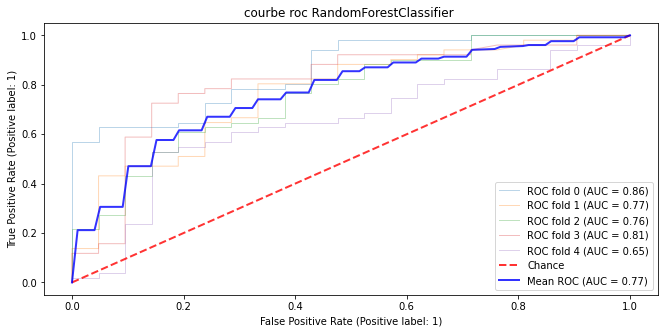

Accuracy: [0.83333333 0.75       0.76388889 0.73611111 0.69444444]
moy_accuracy: 0.76
precision: [0.81967213 0.76190476 0.765625   0.74242424 0.72307692]
moy_precision: 0.76
sensibilité : [0.98039216 0.94117647 0.96078431 0.96078431 0.92156863]
moy_sensibilité: 0.95
spécificité : [0.47619048 0.28571429 0.28571429 0.19047619 0.14285714]
moy_spécificité: 0.28
MCC : [0.57683667 0.31183152 0.35651205 0.2487555  0.09884362]
MCC: 0.32
balanced_accuracy : [0.72829132 0.61344538 0.6232493  0.57563025 0.53221289]
balanced_accuracy: 0.61
roc_auc : [0.85901027 0.76890756 0.76097106 0.80625584 0.64799253]
roc_auc: 0.77
cohen_kappa_scorec : [0.53094463 0.27272727 0.30136986 0.19148936 0.08013937]
cohen_kappa_scorec: 0.28
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

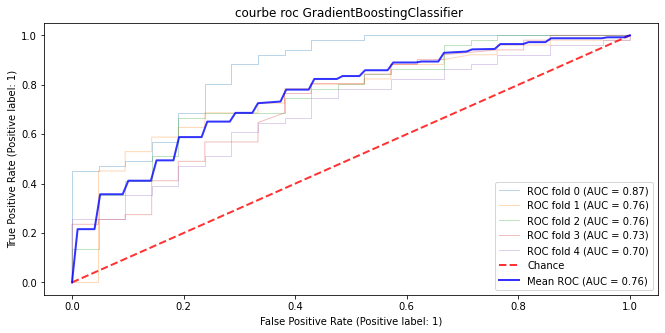

Accuracy: [0.81944444 0.73611111 0.75       0.73611111 0.70833333]
moy_accuracy: 0.75
precision: [0.86538462 0.82       0.7704918  0.77586207 0.75      ]
moy_precision: 0.80
sensibilité : [0.88235294 0.80392157 0.92156863 0.88235294 0.88235294]
moy_sensibilité: 0.87
spécificité : [0.66666667 0.57142857 0.33333333 0.38095238 0.28571429]
moy_spécificité: 0.45
MCC : [0.55714203 0.3703693  0.32203765 0.30239622 0.20498002]
MCC: 0.35
balanced_accuracy : [0.7745098  0.68767507 0.62745098 0.63165266 0.58403361]
balanced_accuracy: 0.66
roc_auc : [0.86554622 0.7605042  0.76097106 0.7264239  0.69561158]
roc_auc: 0.76
cohen_kappa_scorec : [0.55681818 0.37016575 0.29641694 0.29192547 0.19230769]
cohen_kappa_scorec: 0.34
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

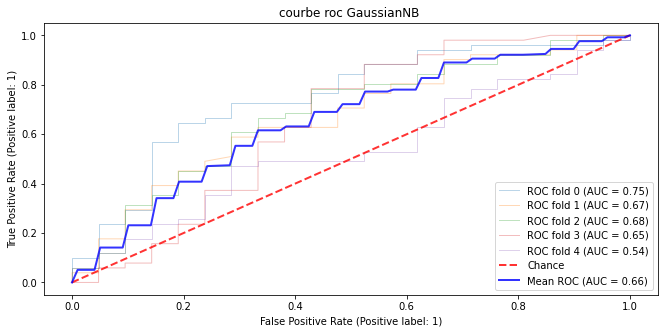

Accuracy: [0.68055556 0.61111111 0.66666667 0.63888889 0.55555556]
moy_accuracy: 0.63
precision: [0.86842105 0.7804878  0.82926829 0.79069767 0.71111111]
moy_precision: 0.80
sensibilité : [0.64705882 0.62745098 0.66666667 0.66666667 0.62745098]
moy_sensibilité: 0.65
spécificité : [0.76190476 0.57142857 0.66666667 0.57142857 0.38095238]
moy_spécificité: 0.59
MCC : [0.37234722 0.18256272 0.3059854  0.22065421 0.00788968]
MCC: 0.22
balanced_accuracy : [0.70448179 0.59943978 0.66666667 0.61904762 0.50420168]
balanced_accuracy: 0.62
roc_auc : [0.74883287 0.66713352 0.68160598 0.6503268  0.53594771]
roc_auc: 0.66
cohen_kappa_scorec : [0.34597156 0.17444717 0.29238329 0.21410579 0.00775194]
cohen_kappa_scorec: 0.21
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

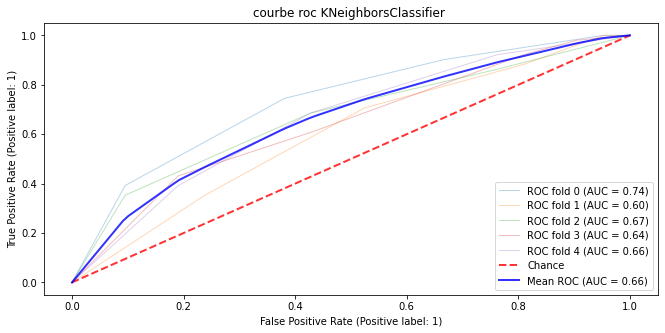

Accuracy: [0.70833333 0.63888889 0.65277778 0.59722222 0.65277778]
moy_accuracy: 0.65
precision: [0.82608696 0.76595745 0.79545455 0.775      0.79545455]
moy_precision: 0.79
sensibilité : [0.74509804 0.70588235 0.68627451 0.60784314 0.68627451]
moy_sensibilité: 0.69
spécificité : [0.61904762 0.47619048 0.57142857 0.57142857 0.57142857]
moy_spécificité: 0.56
MCC : [0.34459128 0.17382848 0.24027523 0.16398401 0.24027523]
MCC: 0.23
balanced_accuracy : [0.68207283 0.59103641 0.62885154 0.58963585 0.62885154]
balanced_accuracy: 0.62
roc_auc : [0.73576097 0.6022409  0.66993464 0.64098973 0.66246499]
roc_auc: 0.66
cohen_kappa_scorec : [0.34031414 0.17241379 0.23469388 0.15533981 0.23469388]
cohen_kappa_scorec: 0.23


In [13]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=0.4,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# logistique

In [ ]:
rfecv2 = RFECV(LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=45))
rfecv2.fit(X,Y)
# check the support
rfecv2.get_support()

In [15]:
# name wise features and count
feature_selected2 =  X.columns[rfecv2.get_support()]
feature_selected2

Index(['Bovins', 'Volaille', 'Caprins', 'Ovins', 'Lesfeuillus', 'Arbrisseau',
       'Pl_herb', 'ZoneUrbaine', 'Moy_IRM', 'Amp1_IRM', 'Amp2_IRM', 'Amp3_IRM',
       'VarT_ann_IRM', 'VarT_Cy_IRM', 'Min_IRM', 'Max_IRM', 'Ph1_IRM',
       'Ph2_IRM', 'Ph3_IRM', 'Moy_TempJ', 'Amp3_TempJ', 'Min_TempJ',
       'Max_TempJ', 'Ph2_TempJ', 'Ph3_TempJ', 'Var_TempJ', 'Moy_TempN',
       'Amp1_TempN', 'Amp2_TempN', 'Min_TempN', 'Max_TempN', 'Ph2_TempN',
       'Ph3_TempN', 'Var_TempN', 'Amp1_NDVI', 'Amp2_NDVI', 'Amp3_NDVI',
       'VarT_ann_NDVI', 'VarT_bi_NDVI', 'VarT_cy_NDVI', 'Min_NDVI', 'Max_NDVI',
       'Ph2_NDVI', 'Ph3_NDVI', 'Var_NDVI', 'Amp1_EVI', 'Amp3_EVI',
       'VarT_ann_EVI', 'VarT_cy_EVI', 'Min_EVI', 'Ph1_EVI', 'Ph3_EVI',
       'Substratum', 'Elev_Max', 'Elev_Moyenne', 'Elev_Min', 'Elev_Moy',
       'Rugosite_Max', 'Rugosite_Moyenne', 'Rugosite_Min', 'Rugosite_Moy',
       'Rugosite_sd', 'Pente_Max', 'IPT_Max', 'IPT_Med', 'IPT_Moy', 'IR_Max',
       'IR_Med', 'IR_Min', 'IR_Moy', 'Bi

In [16]:
 x_rfe2=X[feature_selected2]

In [17]:
 x_rfe2

,Bovins,Volaille,Caprins,Ovins,Lesfeuillus,Arbrisseau,Pl_herb,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Moy_TempJ,Amp3_TempJ,Min_TempJ,Max_TempJ,Ph2_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,Amp1_TempN,Amp2_TempN,Min_TempN,Max_TempN,Ph2_TempN,Ph3_TempN,Var_TempN,Amp1_NDVI,Amp2_NDVI,Amp3_NDVI,VarT_ann_NDVI,VarT_bi_NDVI,VarT_cy_NDVI,...,Amp3_EVI,VarT_ann_EVI,VarT_cy_EVI,Min_EVI,Ph1_EVI,Ph3_EVI,Substratum,Elev_Max,Elev_Moyenne,Elev_Min,Elev_Moy,Rugosite_Max,Rugosite_Moyenne,Rugosite_Min,Rugosite_Moy,Rugosite_sd,Pente_Max,IPT_Max,IPT_Med,IPT_Moy,IR_Max,IR_Med,IR_Min,IR_Moy,Bio_Pre_Ann,Bio_Pre_Qhum,Bio_Pre_Qfr,Prec_Janv,Prec_Fev,Prec_Mars,Prec_Avril,Prec_Nov,Rad_Janv,Rad_Fev,Rad_Avril,Rad_Juin,Rad_Aout,Rad_Sept,Rad_Nov,Rad_Dec
0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,3340,570,110,50,47,49,2690,3950,566,160,231,14905,7,14721,15012,347,203,6,14436,102,44,14309,14561,325,151,3,5,4,2,2,1,3,...,15,1,13,2839,227,51,200,11,6.0,0,5.7500,9,5.0,3,5.5625,2.290435,1.043530,2.875,-0.1875,0.375000,3.375,1.6250,0.625,1.968750,48,22,19,2,2,1,1,4,14965,17773,23683,25088,23115,20888,15480,13965
1,0.000214,0.000000,0.063449,0.034352,0,0,0,0,4010,660,10,50,73,73,3350,4660,581,33,49,15360,31,14941,15609,336,88,26,14516,176,55,14311,14705,321,104,9,6,2,1,13,1,14,...,4,12,15,2570,232,197,199,77,69.0,60,69.1250,8,4.0,2,3.8750,1.268611,0.526827,2.000,-0.5000,-0.281250,2.125,1.3750,0.875,1.375000,29,18,14,3,3,2,1,7,13864,16620,22794,24129,22648,19999,13866,12663
2,0.000214,0.000000,0.063449,0.034352,0,0,0,0,4010,660,10,50,73,73,3350,4660,581,33,49,15360,31,14941,15609,336,88,26,14516,176,55,14311,14705,321,104,9,6,2,1,13,1,14,...,4,12,15,2570,232,197,199,77,69.0,60,69.1250,8,4.0,2,3.8750,1.268611,0.526827,2.000,-0.5000,-0.281250,2.125,1.3750,0.875,1.375000,29,18,14,3,3,2,1,7,13864,16620,22794,24129,22648,19999,13866,12663
3,0.000000,0.000000,0.000000,0.000000,0,0,0,0,3580,590,40,50,48,48,2930,4140,600,214,106,15264,23,14854,15502,335,78,25,14512,160,61,14315,14690,326,109,8,4,1,0,8,0,8,...,2,7,8,2557,502,122,166,79,50.0,7,51.1875,41,30.0,19,29.5000,6.422616,3.763592,9.500,1.5625,0.898438,11.750,9.4375,6.000,9.304688,27,18,14,3,3,1,1,7,13845,16659,22772,24050,22569,19979,13820,12642
4,0.000000,0.000000,0.000000,0.000000,0,0,0,0,3000,590,70,10,18,18,2350,3540,577,185,64,15310,33,14918,15560,330,92,26,14526,182,58,14309,14719,319,112,9,5,4,2,1,0,1,...,6,1,2,2043,421,56,200,57,16.5,-49,16.9375,43,18.0,8,22.3125,11.361772,4.500561,4.125,-3.7500,-3.468750,15.125,6.1250,2.375,7.515625,26,17,13,3,2,1,1,6,13863,16615,22726,23963,22619,19925,13811,12635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.000000,0.000000,0.000000,0.000000,0,0,10,90,2340,810,30,40,88,88,1560,3120,627,131,76,14949,14,14414,15459,234,48,59,14451,334,35,14132,14800,185,90,24,80,5,11,61,0,62,...,45,47,53,2863,254,324,200,73,52.5,39,54.1250,34,18.5,12,20.4375,6.900804,3.031543,11.000,-0.1875,-0.078125,11.000,6.8125,4.625,7.125000,782,378,347,112,95,95,65,126,9008,11911,20226,26169,24585,19350,9837,7810
356,8.495770,105.550156,8.691405,15.116930,0,13,0,0,1390,510,70,20,78,80,880,1950,647,153,241,14903,5,14387,15505,160,325,64,14347,294,40,14078,14675,162,311,19,102,26,7,52,3,55,...,110,65,69,4449,253,393,200,187,112.0,35,108.1875,109,86.0,62,84.6250,10.976538,8.880978,26.875,1.3125,2.828125,28.875,25.1875,21.500,25.093750,709,355,355,125,98,88,58,90,9145,11971,19973,25791,23626,18806,9869,8001
357,7.097884,121.873894,7.796373,13.743934,0,27,0,16,1450,510,110,30,77,80,970,2050,678,129,191,14899,4,14413,15471,158,258,57,14354,278,34,14097,14659,162,183,17,91,27,15,60,5,67,...,153,53,58,3746,303,8,200,33,1.0,0,4.1875,38,14.0,1,16.0000,13.802174,3.840

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

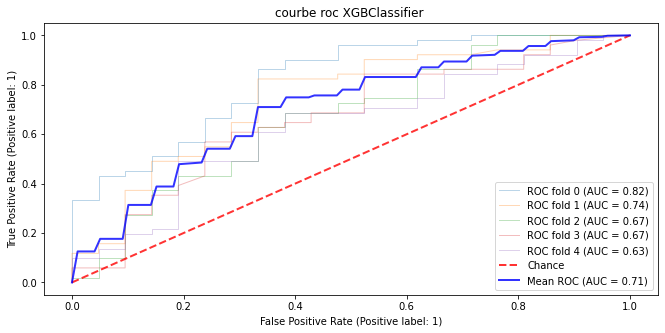

Accuracy: [0.79166667 0.75       0.65277778 0.68055556 0.65277778]
moy_accuracy: 0.71
precision: [0.84615385 0.82352941 0.75       0.78       0.74074074]
moy_precision: 0.79
sensibilité : [0.8627451  0.82352941 0.76470588 0.76470588 0.78431373]
moy_sensibilité: 0.80
spécificité : [0.61904762 0.57142857 0.38095238 0.47619048 0.33333333]
moy_spécificité: 0.48
MCC : [0.48892056 0.39495798 0.14781319 0.2376997  0.1234931 ]
MCC: 0.28
balanced_accuracy : [0.74089636 0.69747899 0.57282913 0.62044818 0.55882353]
balanced_accuracy: 0.64
roc_auc : [0.81886088 0.74369748 0.66760037 0.66526611 0.63492063]
roc_auc: 0.71
cohen_kappa_scorec : [0.48863636 0.39495798 0.14772727 0.23756906 0.12280702]
cohen_kappa_scorec: 0.28
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

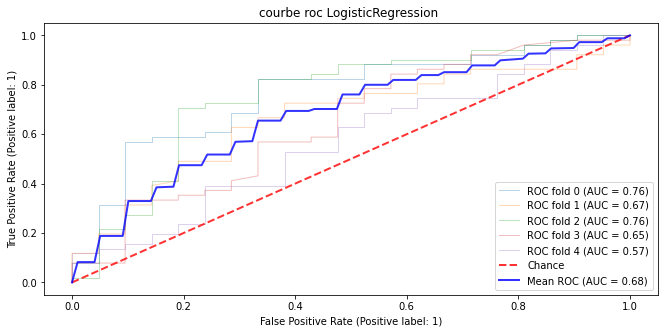

Accuracy: [0.65277778 0.68055556 0.69444444 0.61111111 0.58333333]
moy_accuracy: 0.64
precision: [0.84210526 0.83333333 0.89189189 0.75555556 0.76923077]
moy_precision: 0.82
sensibilité : [0.62745098 0.68627451 0.64705882 0.66666667 0.58823529]
moy_sensibilité: 0.64
spécificité : [0.71428571 0.66666667 0.80952381 0.47619048 0.57142857]
moy_spécificité: 0.65
MCC : [0.31113946 0.32539569 0.41522093 0.13412464 0.14565054]
MCC: 0.27
balanced_accuracy : [0.67086835 0.67647059 0.72829132 0.57142857 0.57983193]
balanced_accuracy: 0.65
roc_auc : [0.76190476 0.67273576 0.75816993 0.64472456 0.57889823]
roc_auc: 0.68
cohen_kappa_scorec : [0.28909953 0.31343284 0.38173302 0.13178295 0.13669065]
cohen_kappa_scorec: 0.25
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

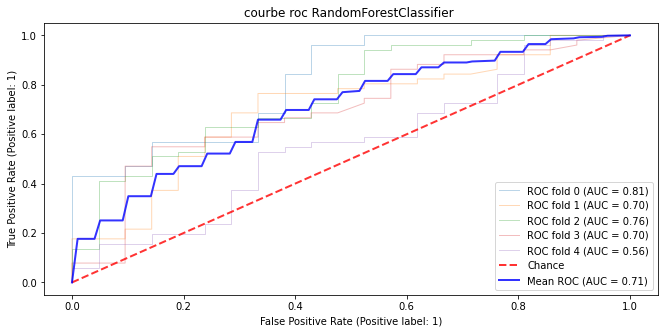

Accuracy: [0.83333333 0.70833333 0.77777778 0.70833333 0.72222222]
moy_accuracy: 0.75
precision: [0.80952381 0.72727273 0.76923077 0.72727273 0.73134328]
moy_precision: 0.75
sensibilité : [1.         0.94117647 0.98039216 0.94117647 0.96078431]
moy_sensibilité: 0.96
spécificité : [0.42857143 0.14285714 0.28571429 0.14285714 0.14285714]
moy_spécificité: 0.23
MCC : [0.58901509 0.1381975  0.40826714 0.1381975  0.18531298]
MCC: 0.29
balanced_accuracy : [0.71428571 0.54201681 0.63305322 0.54201681 0.55182073]
balanced_accuracy: 0.60
roc_auc : [0.81232493 0.70354809 0.76003735 0.70168067 0.55555556]
roc_auc: 0.71
cohen_kappa_scorec : [0.51515152 0.10638298 0.33101045 0.10638298 0.13357401]
cohen_kappa_scorec: 0.24
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

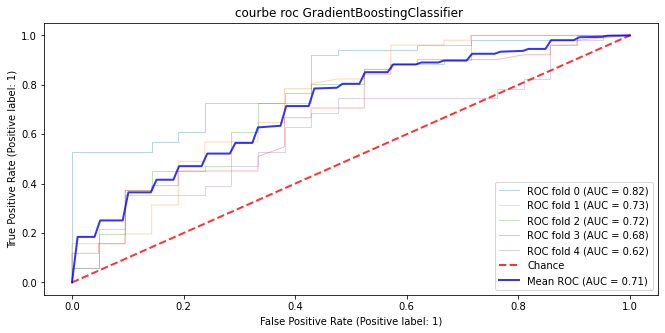

Accuracy: [0.77777778 0.76388889 0.72222222 0.75       0.66666667]
moy_accuracy: 0.74
precision: [0.83018868 0.79310345 0.75409836 0.77966102 0.71428571]
moy_precision: 0.77
sensibilité : [0.8627451  0.90196078 0.90196078 0.90196078 0.88235294]
moy_sensibilité: 0.89
spécificité : [0.57142857 0.42857143 0.28571429 0.38095238 0.14285714]
moy_spécificité: 0.36
MCC : [0.44775813 0.37960377 0.23710464 0.33431065 0.03464795]
MCC: 0.29
balanced_accuracy : [0.71708683 0.66526611 0.59383754 0.64145658 0.51260504]
balanced_accuracy: 0.63
roc_auc : [0.82352941 0.72782446 0.72362278 0.67647059 0.62184874]
roc_auc: 0.71
cohen_kappa_scorec : [0.44668588 0.36645963 0.21824104 0.31861199 0.03030303]
cohen_kappa_scorec: 0.28
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

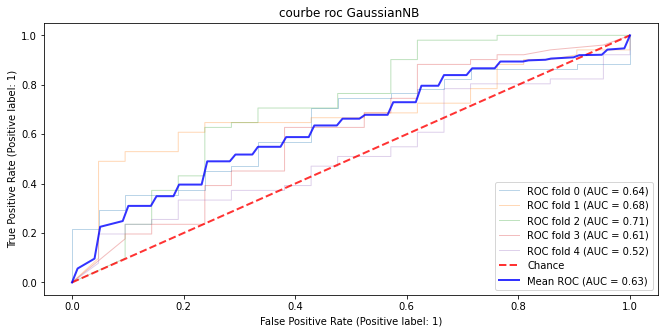

Accuracy: [0.48611111 0.61111111 0.44444444 0.45833333 0.44444444]
moy_accuracy: 0.49
precision: [0.79166667 0.96       0.82352941 0.77272727 0.7037037 ]
moy_precision: 0.81
sensibilité : [0.37254902 0.47058824 0.2745098  0.33333333 0.37254902]
moy_sensibilité: 0.36
spécificité : [0.76190476 0.95238095 0.85714286 0.76190476 0.61904762]
moy_spécificité: 0.79
MCC : [ 0.12964074  0.40381694  0.14090246  0.0939743  -0.00788968]
MCC: 0.15
balanced_accuracy : [0.56722689 0.71148459 0.56582633 0.54761905 0.49579832]
balanced_accuracy: 0.58
roc_auc : [0.63958917 0.68160598 0.70961718 0.61204482 0.5210084 ]
roc_auc: 0.63
cohen_kappa_scorec : [ 0.09756098  0.3100616   0.08918406  0.06772908 -0.00628931]
cohen_kappa_scorec: 0.11
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

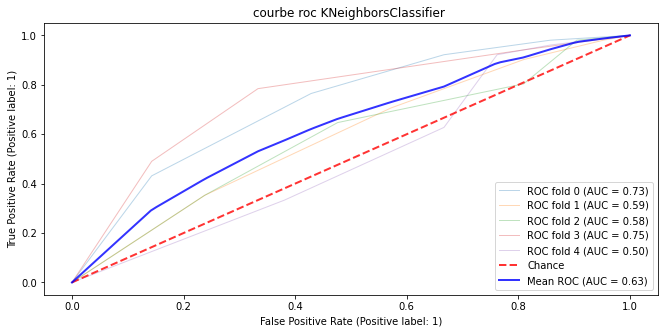

Accuracy: [0.70833333 0.625      0.61111111 0.75       0.54166667]
moy_accuracy: 0.65
precision: [0.8125     0.75       0.76744186 0.85106383 0.69565217]
moy_precision: 0.78
sensibilité : [0.76470588 0.70588235 0.64705882 0.78431373 0.62745098]
moy_sensibilité: 0.71
spécificité : [0.57142857 0.42857143 0.52380952 0.66666667 0.33333333]
moy_spécificité: 0.50
MCC : [ 0.32410186  0.12964074  0.15835184  0.43055978 -0.03710983]
MCC: 0.20
balanced_accuracy : [0.66806723 0.56722689 0.58543417 0.7254902  0.48039216]
balanced_accuracy: 0.61
roc_auc : [0.72502334 0.59150327 0.5821662  0.75210084 0.50420168]
roc_auc: 0.63
cohen_kappa_scorec : [ 0.32258065  0.12903226  0.15365239  0.4270557  -0.03664921]
cohen_kappa_scorec: 0.20


In [18]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=0.4,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe2, Y)):
         clf.fit( x_rfe2.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe2.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe2, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe2, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe2, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe2, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe2, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# Random_forest

In [19]:
rfecv3 = RFECV(RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=45))
rfecv3.fit(X,Y)
# check the support
rfecv3.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [20]:
# name wise features and count
feature_selected3 =  X.columns[rfecv3.get_support()]
feature_selected3

Index(['X_long', 'Y_lat', 'Bovins', 'Caprins', 'Ovins', 'Equides',
       'Arbrisseau', 'VegCul', 'Moy_IRM', 'Amp1_IRM',
       ...
       'Vap_Oct', 'Vent_Fev', 'Vent_Mars', 'Vent_Avril', 'Vent_Mai',
       'Vent_Juin', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=183)

In [21]:
 x_rfe3=X[feature_selected3]

In [22]:
 x_rfe3

,X_long,Y_lat,Bovins,Caprins,Ovins,Equides,Arbrisseau,VegCul,Moy_IRM,Amp1_IRM,Amp3_IRM,VarT_ann_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,Min_TempJ,Max_TempJ,Ph1_TempJ,Ph2_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,Amp1_TempN,Amp2_TempN,Amp3_TempN,VarT_ann_TempN,VarT_cy_TempN,Min_TempN,Max_TempN,Ph1_TempN,Ph2_TempN,Ph3_TempN,Moy_NDVI,...,Rad_Nov,Rad_Dec,Tmax_Janv,Tmax_Fev,Tmax_Mars,Tmax_Avril,Tmax_Mai,Tmax_Juin,Tmax_Juill,Tmax_Aout,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.624435,0,0,3340,570,50,47,49,2690,3950,566,160,231,14905,96,83,7,14721,15012,672,347,203,6,14436,102,44,5,63,75,14309,14561,768,325,151,1106,...,15480,13965,21.5,21.799999,22.700001,22.600000,23.200001,24.299999,25.200001,26.200001,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,5.6,6.1,6.9,7.2,7.1,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.063449,0.034352,0.040295,0,0,4010,660,50,73,73,3350,4660,581,33,49,15360,312,126,31,14941,15609,643,336,88,26,14516,176,55,18,72,80,14311,14705,721,321,104,1082,...,13866,12663,21.9,22.600000,24.000000,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,4.1,4.8,5.6,5.7,6.4,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.063449,0.034352,0.040295,0,0,4010,660,50,73,73,3350,4660,581,33,49,15360,312,126,31,14941,15609,643,336,88,26,14516,176,55,18,72,80,14311,14705,721,321,104,1082,...,13866,12663,21.9,22.600000,24.000000,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,4.1,4.8,5.6,5.7,6.4,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.269410,0,0,3580,590,50,48,48,2930,4140,600,214,106,15264,306,120,23,14854,15502,636,335,78,25,14512,160,61,21,66,76,14315,14690,717,326,109,1090,...,13820,12642,21.9,22.600000,24.000000,24.600000,25.500000,27.100000,28.600000,29.700001,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,4.5,5.1,5.6,5.5,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.379107,0,0,3000,590,10,18,18,2350,3540,577,185,64,15310,295,115,33,14918,15560,651,330,92,26,14526,182,58,14,72,79,14309,14719,722,319,112,1060,...,13811,12635,22.0,22.799999,24.100000,24.700001,25.700001,27.299999,28.700001,29.900000,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,4.2,5.0,5.2,5.4,5.7,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-5.833954,35.759465,0.000000,0.000000,0.000000,1.795786,0,0,2340,810,40,88,88,1560,3120,627,131,76,14949,528,46,14,14414,15459,654,234,48,59,14451,334,35,5,91,92,14132,14800,685,185,90,1222,...,9837,7810,15.5,16.600000,18.500000,19.900000,22.000000,25.500000,27.000000,27.400000,26.100000,22.700001,19.400000,16.600000,8.3,9.5,11.3,12.7,14.900000,18.299999,20.799999,21.299999,1.15,1.21,1.29,1.48,1.74,1.97,2.07,1.93,1.64,4.4,4.2,3.9,3.7,3.7,3.4,3.5,3.8,3.9
356,-5.366667,35.766667,8.495770,8.691405,15.116930,0.698221,13,39,1390,510,20,78,80,880,1950,647,153,241

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

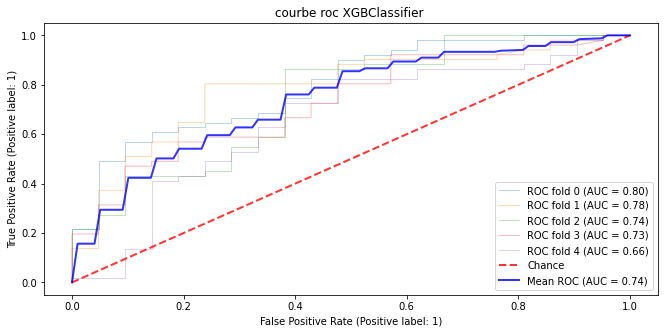

Accuracy: [0.73611111 0.76388889 0.72222222 0.70833333 0.70833333]
moy_accuracy: 0.73
precision: [0.82       0.80357143 0.82978723 0.77777778 0.77777778]
moy_precision: 0.80
sensibilité : [0.80392157 0.88235294 0.76470588 0.82352941 0.82352941]
moy_sensibilité: 0.82
spécificité : [0.57142857 0.47619048 0.61904762 0.42857143 0.42857143]
moy_spécificité: 0.50
MCC : [0.3703693  0.39199677 0.36637696 0.26462806 0.26462806]
MCC: 0.33
balanced_accuracy : [0.68767507 0.67927171 0.69187675 0.62605042 0.62605042]
balanced_accuracy: 0.66
roc_auc : [0.79831933 0.78478058 0.74323063 0.72875817 0.65826331]
roc_auc: 0.74
cohen_kappa_scorec : [0.37016575 0.38554217 0.36339523 0.26315789 0.26315789]
cohen_kappa_scorec: 0.33
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

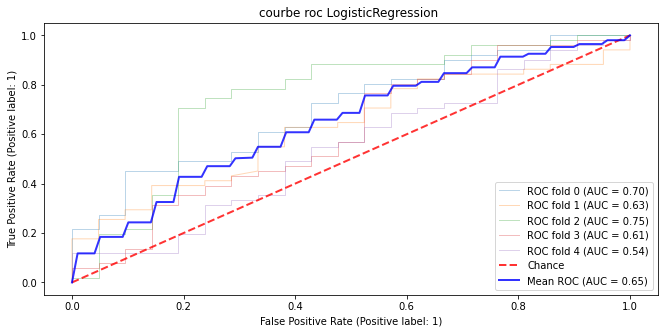

Accuracy: [0.625      0.61111111 0.68055556 0.55555556 0.54166667]
moy_accuracy: 0.60
precision: [0.78571429 0.75555556 0.88888889 0.73170732 0.725     ]
moy_precision: 0.78
sensibilité : [0.64705882 0.66666667 0.62745098 0.58823529 0.56862745]
moy_sensibilité: 0.62
spécificité : [0.57142857 0.47619048 0.80952381 0.47619048 0.47619048]
moy_spécificité: 0.56
MCC : [0.20143543 0.13412464 0.39723602 0.05914004 0.040996  ]
MCC: 0.17
balanced_accuracy : [0.6092437  0.57142857 0.71848739 0.53221289 0.52240896]
balanced_accuracy: 0.59
roc_auc : [0.70401494 0.62978525 0.7535014  0.60690943 0.54248366]
roc_auc: 0.65
cohen_kappa_scorec : [0.19402985 0.13178295 0.36111111 0.05651106 0.03883495]
cohen_kappa_scorec: 0.16
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

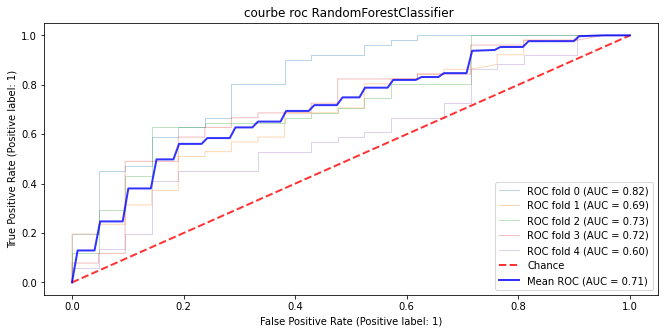

Accuracy: [0.80555556 0.70833333 0.76388889 0.75       0.70833333]
moy_accuracy: 0.75
precision: [0.80327869 0.734375   0.765625   0.74626866 0.734375  ]
moy_precision: 0.76
sensibilité : [0.96078431 0.92156863 0.96078431 0.98039216 0.92156863]
moy_sensibilité: 0.95
spécificité : [0.42857143 0.19047619 0.28571429 0.19047619 0.19047619]
moy_spécificité: 0.26
MCC : [0.49190367 0.16205093 0.35651205 0.30551599 0.16205093]
MCC: 0.30
balanced_accuracy : [0.69467787 0.55602241 0.6232493  0.58543417 0.55602241]
balanced_accuracy: 0.60
roc_auc : [0.82352941 0.68954248 0.7264239  0.72315593 0.60130719]
roc_auc: 0.71
cohen_kappa_scorec : [0.45276873 0.1369863  0.30136986 0.22021661 0.1369863 ]
cohen_kappa_scorec: 0.25
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

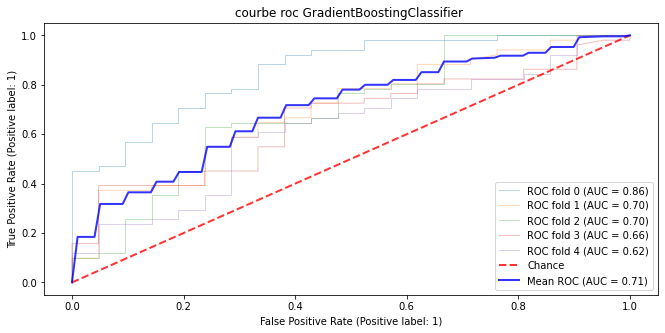

Accuracy: [0.80555556 0.72222222 0.69444444 0.65277778 0.68055556]
moy_accuracy: 0.71
precision: [0.8490566  0.77192982 0.75438596 0.70967742 0.71875   ]
moy_precision: 0.76
sensibilité : [0.88235294 0.8627451  0.84313725 0.8627451  0.90196078]
moy_sensibilité: 0.87
spécificité : [0.61904762 0.38095238 0.33333333 0.14285714 0.14285714]
moy_spécificité: 0.32
MCC : [0.51708842 0.27274872 0.19750769 0.0073631  0.06482037]
MCC: 0.21
balanced_accuracy : [0.75070028 0.62184874 0.58823529 0.50280112 0.52240896]
balanced_accuracy: 0.60
roc_auc : [0.85620915 0.70074697 0.6984127  0.65686275 0.62464986]
roc_auc: 0.71
cohen_kappa_scorec : [0.51585014 0.26605505 0.19266055 0.00662252 0.05479452]
cohen_kappa_scorec: 0.21
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

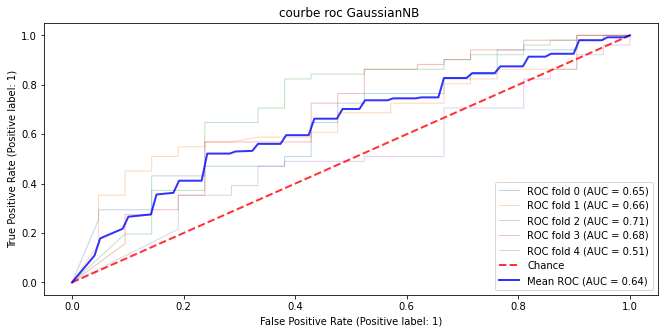

Accuracy: [0.52777778 0.56944444 0.48611111 0.61111111 0.52777778]
moy_accuracy: 0.54
precision: [0.77419355 0.91666667 0.85       0.84848485 0.75757576]
moy_precision: 0.83
sensibilité : [0.47058824 0.43137255 0.33333333 0.54901961 0.49019608]
moy_sensibilité: 0.45
spécificité : [0.66666667 0.9047619  0.85714286 0.76190476 0.61904762]
moy_spécificité: 0.76
MCC : [0.12599399 0.32410186 0.19329417 0.28363526 0.09965563]
MCC: 0.21
balanced_accuracy : [0.56862745 0.66806723 0.5952381  0.65546218 0.55462185]
balanced_accuracy: 0.61
roc_auc : [0.6503268  0.66246499 0.70961718 0.67600373 0.50887021]
roc_auc: 0.64
cohen_kappa_scorec : [0.10722101 0.24390244 0.1328125  0.24832215 0.08724832]
cohen_kappa_scorec: 0.16
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

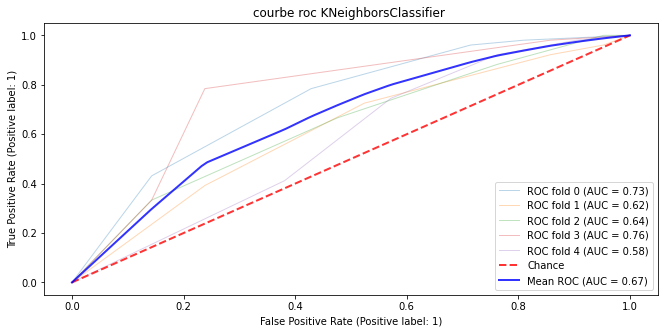

Accuracy: [0.72222222 0.65277778 0.625      0.77777778 0.65277778]
moy_accuracy: 0.69
precision: [0.81632653 0.77083333 0.77272727 0.88888889 0.76      ]
moy_precision: 0.80
sensibilité : [0.78431373 0.7254902  0.66666667 0.78431373 0.74509804]
moy_sensibilité: 0.74
spécificité : [0.57142857 0.47619048 0.52380952 0.76190476 0.42857143]
moy_spécificité: 0.55
MCC : [0.34679137 0.19446112 0.17759473 0.51282949 0.1713649 ]
MCC: 0.28
balanced_accuracy : [0.67787115 0.60084034 0.5952381  0.77310924 0.58683473]
balanced_accuracy: 0.65
roc_auc : [0.73482726 0.61718021 0.63865546 0.76470588 0.57749767]
roc_auc: 0.67
cohen_kappa_scorec : [0.34604905 0.19354839 0.17346939 0.50387597 0.17127072]
cohen_kappa_scorec: 0.28


In [29]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=0.4,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe3, Y)):
         clf.fit( x_rfe3.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe3.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe3, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe3, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe3, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe3, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe3, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))
    

# Gradient_bosting

In [24]:
rfecv4 = RFECV(GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=1, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1),cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=45))
rfecv4.fit(X,Y)
# check the support
rfecv4.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [25]:
# name wise features and count
feature_selected4 =  X.columns[rfecv4.get_support()]
feature_selected4

Index(['Volaille', 'Caprins', 'Ovins', 'Equides', 'Coniferes', 'ZoneAride',
       'ZonePel', 'Lesfeuillus', 'Caduc', 'Autres',
       ...
       'Vent_Fev', 'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin',
       'Vent_Juill', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=181)

In [26]:
 x_rfe4=X[feature_selected4]

In [27]:
 x_rfe4

,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Var_IRM,Amp2_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,Ph1_TempJ,Ph2_TempJ,Ph3_TempJ,Var_TempJ,Moy_TempN,Amp2_TempN,Amp3_TempN,VarT_ann_TempN,VarT_bi_TempN,VarT_cy_TempN,Min_TempN,...,Rad_Oct,Rad_Nov,Rad_Dec,Tmax_Janv,Tmax_Mars,Tmax_Avril,Tmax_Mai,Tmax_Juill,Tmax_Aout,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Sept,Tmin_Oct,Tmin_Nov,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,0,83,23,0,672,347,203,6,14436,44,5,63,12,75,14309,...,18177,15480,13965,21.5,22.700001,22.600000,23.200001,25.200001,26.200001,26.500000,26.000000,24.500000,22.500000,15.7,15.6,16.200001,17.299999,19.200001,18.799999,17.299999,1.44,1.55,1.63,1.72,1.91,2.18,2.16,2.02,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,6.3,5.4,5.5,4.9
1,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,0,126,12,1,643,336,88,26,14516,55,18,72,7,80,14311,...,17092,13866,12663,21.9,24.000000,24.600000,25.500000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,14.2,14.7,15.700000,17.299999,19.400000,17.799999,15.300000,1.32,1.42,1.50,1.62,1.84,2.10,2.09,1.95,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.7,4.3,3.7,3.8
2,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,0,126,12,1,643,336,88,26,14516,55,18,72,7,80,14311,...,17092,13866,12663,21.9,24.000000,24.600000,25.500000,28.600000,29.700001,29.200001,27.600000,25.100000,22.600000,14.2,14.7,15.700000,17.299999,19.400000,17.799999,15.300000,1.32,1.42,1.50,1.62,1.84,2.10,2.09,1.95,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.7,4.3,3.7,3.8
3,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,0,120,11,0,636,335,78,25,14512,61,21,66,9,76,14315,...,17043,13820,12642,21.9,24.000000,24.600000,25.500000,28.600000,29.700001,29.200001,27.600000,25.100000,22.700001,14.4,15.0,16.000000,17.600000,19.600000,18.100000,15.500000,1.33,1.43,1.52,1.64,1.86,2.12,2.10,1.97,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,5.7,4.1,3.7,3.9
4,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,10,115,10,1,651,330,92,26,14526,58,14,72,7,79,14309,...,17075,13811,12635,22.0,24.100000,24.700001,25.700001,28.700001,29.900000,29.400000,27.799999,25.299999,22.900000,14.6,15.2,16.100000,17.700001,19.700001,18.200001,15.600000,1.34,1.44,1.53,1.65,1.88,2.14,2.13,1.99,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.000000,0.000000,0.000000,1.795786,0,0,0,0,0,0,0,10,0,90,2340,810,30,40,88,0,0,88,1560,3120,627,0,46,1,0,654,234,48,59,14451,35,5,91,1,92,14132,...,14358,9837,7810,15.5,18.500000,19.900000,22.000000,27.000000,27.400000,26.100000,22.700001,19.400000,16.600000,11.3,12.7,14.900000,18.299999,19.900000,16.500000,13.300000,1.15,1.21,1.29,1.48,1.74,2.07,1.93,1.64,1.21,3.6,4.4,4.2,3.9,3.7,3.7,3.6,3.4,3.5,3.8,3.9
356,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,1390,510,70,20,78,2,0,80,880,1950,647,0,78,2,0,670,160,325,64,14347,40,1,92,2,94,14078,...,13856,9869,8001,15.2,17.299999,18.900000,21.200001,27.200001,27.700001,25.700001,22.100000,18.700001,16.500000,11.5,13.1,15.400000,18.500000,19.700001,16.100000,12.800000,1.14,1.20,1.27,1.47,1.74,2.07,1.93,1.65,1.19,4.1,4.6,4.6,4.3,4.1,3

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

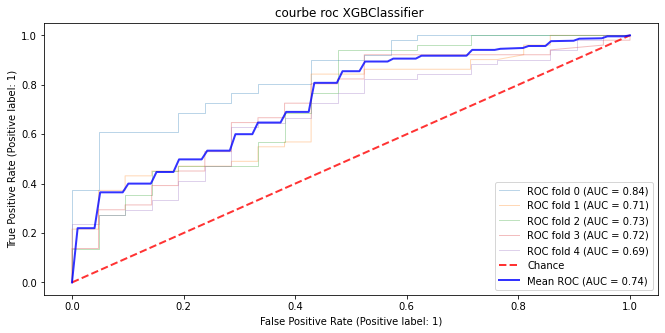

Accuracy: [0.75       0.75       0.68055556 0.72222222 0.69444444]
moy_accuracy: 0.72
precision: [0.82352941 0.8        0.80434783 0.79245283 0.73770492]
moy_precision: 0.79
sensibilité : [0.82352941 0.8627451  0.7254902  0.82352941 0.88235294]
moy_sensibilité: 0.82
spécificité : [0.57142857 0.47619048 0.57142857 0.47619048 0.23809524]
moy_spécificité: 0.47
MCC : [0.39495798 0.36274888 0.28097443 0.30909755 0.15217164]
MCC: 0.30
balanced_accuracy : [0.69747899 0.66946779 0.64845938 0.64985994 0.56022409]
balanced_accuracy: 0.65
roc_auc : [0.84220355 0.71101774 0.73295985 0.71988796 0.6853408 ]
roc_auc: 0.74
cohen_kappa_scorec : [0.39495798 0.35905045 0.27748691 0.30835735 0.14006515]
cohen_kappa_scorec: 0.30
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

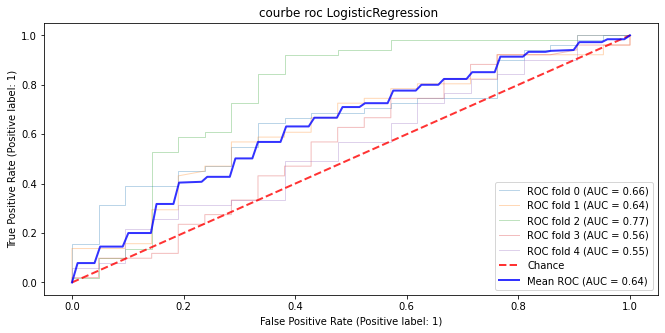

Accuracy: [0.59722222 0.625      0.65277778 0.59722222 0.55555556]
moy_accuracy: 0.61
precision: [0.80555556 0.77272727 0.84210526 0.76190476 0.72093023]
moy_precision: 0.78
sensibilité : [0.56862745 0.66666667 0.62745098 0.62745098 0.60784314]
moy_sensibilité: 0.62
spécificité : [0.66666667 0.52380952 0.71428571 0.52380952 0.42857143]
moy_spécificité: 0.57
MCC : [0.21389632 0.17759473 0.31113946 0.13945529 0.03374711]
MCC: 0.18
balanced_accuracy : [0.61764706 0.5952381  0.67086835 0.57563025 0.51820728]
balanced_accuracy: 0.60
roc_auc : [0.6713352  0.63258637 0.76190476 0.56535948 0.54341737]
roc_auc: 0.63
cohen_kappa_scorec : [0.19444444 0.17346939 0.28909953 0.13432836 0.03274559]
cohen_kappa_scorec: 0.16
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

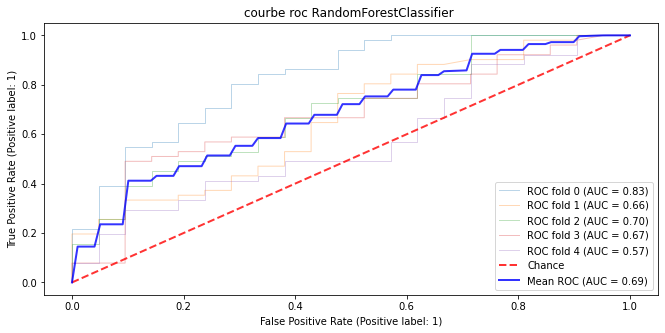

Accuracy: [0.83333333 0.73611111 0.77777778 0.70833333 0.69444444]
moy_accuracy: 0.75
precision: [0.81967213 0.74242424 0.76923077 0.72058824 0.72307692]
moy_precision: 0.75
sensibilité : [0.98039216 0.96078431 0.98039216 0.96078431 0.92156863]
moy_sensibilité: 0.96
spécificité : [0.47619048 0.19047619 0.28571429 0.0952381  0.14285714]
moy_spécificité: 0.24
MCC : [0.57683667 0.2487555  0.40826714 0.11116602 0.09884362]
MCC: 0.29
balanced_accuracy : [0.72829132 0.57563025 0.63305322 0.5280112  0.53221289]
balanced_accuracy: 0.60
roc_auc : [0.82726424 0.66059757 0.69934641 0.67460317 0.57142857]
roc_auc: 0.69
cohen_kappa_scorec : [0.53094463 0.19148936 0.33101045 0.07352941 0.08013937]
cohen_kappa_scorec: 0.24
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

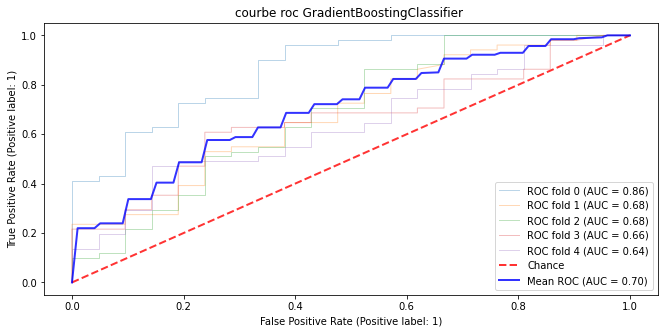

Accuracy: [0.80555556 0.68055556 0.72222222 0.66666667 0.72222222]
moy_accuracy: 0.72
precision: [0.8627451  0.76923077 0.76271186 0.72131148 0.73846154]
moy_precision: 0.77
sensibilité : [0.8627451  0.78431373 0.88235294 0.8627451  0.94117647]
moy_sensibilité: 0.87
spécificité : [0.66666667 0.42857143 0.33333333 0.19047619 0.19047619]
moy_spécificité: 0.36
MCC : [0.52941176 0.21603466 0.2548705  0.06723863 0.2019848 ]
MCC: 0.25
balanced_accuracy : [0.76470588 0.60644258 0.60784314 0.52661064 0.56582633]
balanced_accuracy: 0.61
roc_auc : [0.86087768 0.68020542 0.68160598 0.65779645 0.63772176]
roc_auc: 0.70
cohen_kappa_scorec : [0.52941176 0.21590909 0.24290221 0.06188925 0.16376307]
cohen_kappa_scorec: 0.24
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

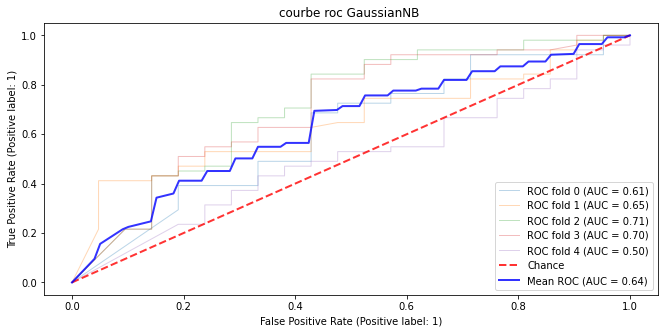

Accuracy: [0.52777778 0.54166667 0.5        0.54166667 0.5       ]
moy_accuracy: 0.52
precision: [0.77419355 0.875      0.85714286 0.84615385 0.75862069]
moy_precision: 0.82
sensibilité : [0.47058824 0.41176471 0.35294118 0.43137255 0.43137255]
moy_sensibilité: 0.42
spécificité : [0.66666667 0.85714286 0.85714286 0.80952381 0.66666667]
moy_spécificité: 0.77
MCC : [0.12599399 0.25928149 0.21008403 0.22796038 0.09085762]
MCC: 0.18
balanced_accuracy : [0.56862745 0.63445378 0.60504202 0.62044818 0.54901961]
balanced_accuracy: 0.60
roc_auc : [0.61157796 0.64892624 0.71428571 0.70448179 0.50140056]
roc_auc: 0.64
cohen_kappa_scorec : [0.10722101 0.19512195 0.14792899 0.17842324 0.07494647]
cohen_kappa_scorec: 0.14
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

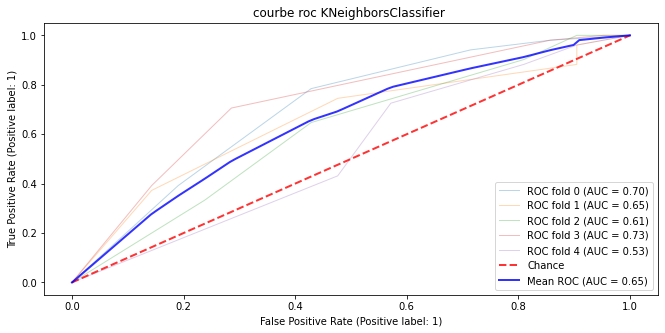

Accuracy: [0.72222222 0.68055556 0.625      0.70833333 0.63888889]
moy_accuracy: 0.68
precision: [0.81632653 0.79166667 0.78571429 0.85714286 0.75510204]
moy_precision: 0.80
sensibilité : [0.78431373 0.74509804 0.64705882 0.70588235 0.7254902 ]
moy_sensibilité: 0.72
spécificité : [0.57142857 0.52380952 0.57142857 0.71428571 0.42857143]
moy_spécificité: 0.56
MCC : [0.34679137 0.25928149 0.20143543 0.38737582 0.15018524]
MCC: 0.27
balanced_accuracy : [0.67787115 0.63445378 0.6092437  0.71008403 0.57703081]
balanced_accuracy: 0.64
roc_auc : [0.70261438 0.65499533 0.61391223 0.73015873 0.53034547]
roc_auc: 0.65
cohen_kappa_scorec : [0.34604905 0.25806452 0.19402985 0.37313433 0.14986376]
cohen_kappa_scorec: 0.26


In [30]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=0.4,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)

def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=45)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe4, Y)):
         clf.fit( x_rfe4.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe4.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe4, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe4, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe4, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe4, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe4, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe4, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))